#**Analise De Dados Adimplentes e Inadimplentestes**

# Breve descrição do problema


Irei explorar os dados de crédito presentes neste [link](https://https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém as informações sobre clientes de uma instituição financeira. Meu objetivo é explicar a segunda coluna, com o nome **default**, que indica se o cliente é adimplente( default == 0 ), ou inadimplente( default == 1 ), quero entender o porque do cliente deixar de cumprir com suas dividas me baseando no comportamento de outros atributos, como salário,escolaridade,limite do cartão e movimentação financeira.

# 1 Códigos de importação usados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

#2 Dados Usados

Nesse problema o download e o carregamento dos dados ja foram feitos em uma pagina web [link](https://https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv).

#3 **Exploração de Dados**






começarei lendos os dados em um dataframe usando o pandas.


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv", na_values="na")

df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


agora que tenho os dados, vou entender um pouco melhor a estrutura do meu conjunto de dados.

In [ ]:
df.shape # total de linhas e colunas

(10127, 16)

In [ ]:
df[df["default"] == 0].shape # total de linhas dos clientes adimplentes

(8500, 16)

In [ ]:
df[df["default"] == 1].shape #total de linhas dos clientes inadimplentes

(1627, 16)

In [ ]:
qntd_total, _ = df.shape
qntd_adimplentes, _ = df[df["default"] == 0].shape
qntd_inadimplentes, _ = df[df["default"] == 1].shape

In [ ]:
print(f"A proporção de clientes adimplentes é de {round(100 * qntd_adimplentes / qntd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qntd_inadimplentes / qntd_total, 2)}%")

A proporção de clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%



# 3.1 Schema
  




O schema é essencial na minha analise pois é nele que eu conseguirei visualizar melhor meus dados e encontrar algum tipo de erro, também uso o schema para entender e relacionar o assunto das colunas com o tipo de dado que esta presente em cada uma delas.

In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [ ]:
df.dtypes # conferindo os tipos dos dados presente em cada coluna

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Percebe-se que já pelo schema eu consigo encontrar um erro nos tipos de dados, utilizando o método.dtypes para conferir o tipo de dado em cada coluna encontro o erro no tipo de dado das colunas limite_credito e valor_transacoes_12m, que estão descritas como "object" que no pandas seria a "string", e isso não condiz com o assunto da coluna que deviria ser um "float", precisarei tratar isso mais adiante.

In [ ]:
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Usando o método.describe() e filtrando apenas para as colunas do tipo "object" obtenho informações valiosas sobre os dados, tal como a quantidade dos dados validos "count", a quantidade de opções para determinada coluna "unique", qual mais aparece entre as opções "top" e a frequencia em que ele aparece "freq". Porem ja com a informação "count" posso ver que tenho dados faltantes nas colunas escolaridade, estado_civil e salario_anual, também vejo que as colunas limite_credito e valor_transacoes_12m estão presentes, oq não deveria acontecer, mas acontece porque o tipo do dado está sendo tratado como "object", precisarei tratar desses erros.


In [ ]:
df.drop("id", axis=1).select_dtypes("number").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Usando o método.describe() e filtrando apenas as colunas do tipo "number" obtenho informações valiosas sobre os dados do tipo "int" e "float", como por exemplo a média "mean", o desvio padrão "std", o minimo "min" e o maximo "max". E é nessa tabela que as colunas limite_credito e valor_transacoes_12m deviriam estar.

# 3.2 Dados Faltantes

In [ ]:
df.isna().any() # verificando quais colunas possuem dados faltantes

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

A função abaixo levanta algumas estatísticas sobre as colunas dos dados faltantes.


In [ ]:
def status_dados_faltantes(df: pd.DataFrame) -> None:
  
  status_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qntd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {"quantidade": qntd, "porcentagem": round(100 * qntd/total, 2)}}
      status_dados_faltantes.append(dict_dados_faltantes)

  for status in status_dados_faltantes:
    print(status)

In [ ]:
status_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Usando a função definida anteriormente no meu df inteiro consigo as informações sobre os dados faltantes nas determinadas colunas, obtenho a quantidade de dados faltantes e a porcentagem de quanto está faltando na determinada coluna. Agora como minha base de dados é desbalanceada, eu preciso entender a porcentagem para cada um dos grupos, adimplentes e inadimplentes.


In [ ]:
status_dados_faltantes(df=df[df["default"] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
status_dados_faltantes(df=df[df["default"] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Percebe-se que mesmo com os filtros de adimplentes e inadimplentes a porcentagem se mantem, e isso me permite eliminar esses dados faltantes pois o impacto no meu banco de dados será igual.

# 4 **Transformação e limpeza de dados**

agora que entendo melhor a natureza do conjunto de dados, irei conduzir um *data wrangling*. meu objetivo é corrigir o *schema* das minhas colunas e remover os dados faltantes.

#4.1 Correção do Schema

revendo os tipos de dado das minhas colunas.

In [ ]:
df[["limite_credito", "valor_transacoes_12m"]].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[["limite_credito", "valor_transacoes_12m"]].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


O problema é no formato que o dado está presente na minha base de dados, o valor está descrito no formato português com "." e ",", o python reconhece apenas valores numéricos no formato inglês, então precisarei fazer uma alteração nesses valores removendo o "." e "," e trocando a virgula por um ponto. Criei uma função lambda para isso.


In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22'] # testando a função antes de aplicar nas colunas
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Aplicando a função lambda nas colunas com o tipo do dado errado.

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

conferindo novamente os tipos de dados das colunas, e agora percebe-se que o tipo do dado das colunas não são mais "object" e sim "float64" que é o correto.

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [ ]:
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [ ]:
df.drop("id", axis=1).select_dtypes("number").describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Agora após esse tratamento feito, nóto que as colunas limite_credito e valor_transacoes_12m estão presentes na descrição dos atributos numericos.

# 4.2 Remoção dos dados faltantes

In [ ]:
df.dropna(inplace=True) # removendo as linhas que contém dados faltantes.

In [ ]:
df.shape # o total de linhas diminuiu.

(7081, 16)

In [ ]:
df[df["default"] == 0].shape # faz todo sentido o mesmo acontecer com os adimplentes.

(5968, 16)

In [ ]:
df[df["default"] == 1].shape # faz todo sentido o mesmo acontecer com os inadimplentes.

(1113, 16)

Agora fazendo uma comparação com os dados anteriores, fica visível que a proporção se manteve e a base de dados ficou super consistente.


In [ ]:
nova_qntd_total, _= df.shape
nova_qntd_adimplentes, _= df[df["default"] == 0].shape
nova_qntd_inadimplentes, _= df[df["default"] == 1].shape

In [ ]:
print(f"A antiga proporção de adimplentes ativos é de {round(100 * qntd_adimplentes / qntd_total, 2)}%")
print(f"A nova proporção de adimplentes ativos é de {round(100 * nova_qntd_adimplentes / nova_qntd_total, 2)}%")
print("")
print(f"A antiga proporção de inadimplentes é de {round(100 * qntd_inadimplentes / qntd_total, 2)}%")
print(f"A nova proporção de inadimplentes é de {round(100 * nova_qntd_inadimplentes / nova_qntd_total, 2)}%")

A antiga proporção de adimplentes ativos é de 83.93%
A nova proporção de adimplentes ativos é de 84.28%

A antiga proporção de inadimplentes é de 16.07%
A nova proporção de inadimplentes é de 15.72%


#5 **Visualização de dados**

Agora com os dados prontos, vou criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta buscando sempre entender o que leva um cliente a inadimplencia. E para isso, vou comparar a base de dados com todos os clientes com a base de dados dos adimplentes e inadimplentes.


In [ ]:
df_adimplente = df[df["default"] == 0] # criando um df para adimplente

In [ ]:
df_inadimplente = df[df["default"] == 1] # criando um df para inadimplente

Eu irei fazer dois conjuntos de visualizações, um de variáveis categóricas e o outro de variáveis numéricas, farei isso pois vou utilizar técnicas diferentes para visualizar os dados de categorias diferentes. Lembrando sempre as regras da lei LGPD.


# 5.1  Visualizações categóricas

In [ ]:
df.select_dtypes("object").head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Definindo a função que vai ser responsável pela criação dos meus gráficos de variáveis categóricas


In [ ]:
def graficos_categoricos(coluna, titulos) -> object:
  eixo = 0
  max_y = 0
  max = df.select_dtypes("object").describe()[coluna]["freq"] * 1.1
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
  
  for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: "frequencia_absoluta"}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot["frequencia_absoluta"], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

    figura.show()

*   Escolaridade


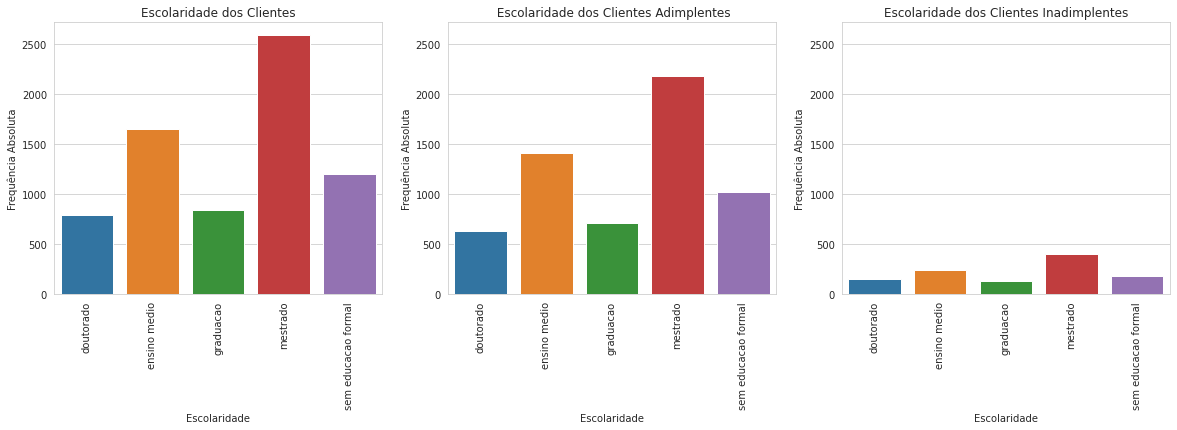

In [ ]:
coluna = "escolaridade"
titulos = ["Escolaridade dos Clientes", " Escolaridade dos Clientes Adimplentes", "Escolaridade dos Clientes Inadimplentes"]

graficos_categoricos(coluna, titulos)



*  Salario Anual




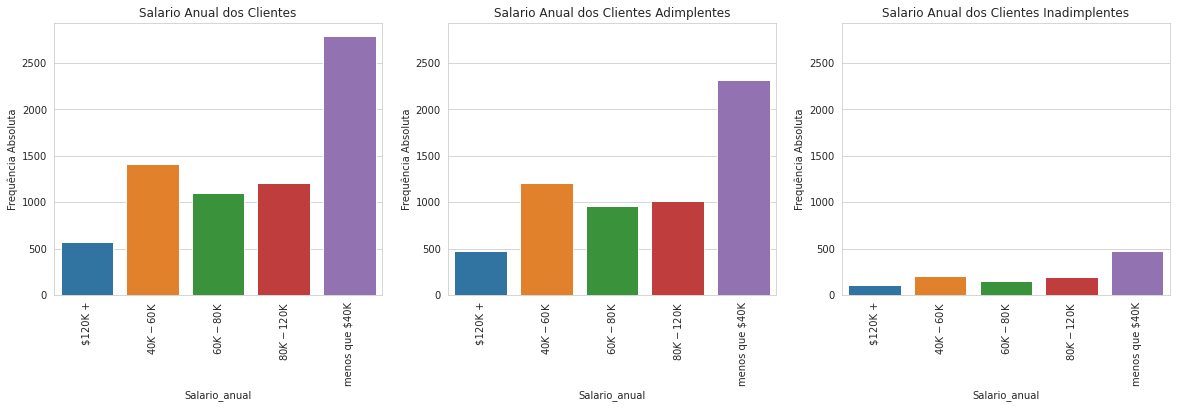

In [ ]:
coluna = "salario_anual"
titulos = ["Salario Anual dos Clientes", "Salario Anual dos Clientes Adimplentes", "Salario Anual dos Clientes Inadimplentes"]

graficos_categoricos(coluna, titulos)

Após fazer uma analisar nesses gráficos, percebo que as variáveis categóricas não vão me ajudar a explicar o do porque um cliente se torna inadimplente. Percebe-se que o comportamento dos clientes inadimplentes é próximo ou quase igual ao comportamento dos clientes adimplentes com relação à escolaridade e salario anual, então partirei para os gráficos de variáveis numéricas.

# 5.2 Visualizações numéricas

In [ ]:
df.drop(["id", "default"], axis=1).select_dtypes("number").head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Definindo a função que será responsável pelos meus gráficos de variáveis numéricas.

In [ ]:
def graficos_numericos(coluna, titulos) -> object:

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
  
  for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat="count", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()


* Quantidade de Transações nos Últimos 12 Meses

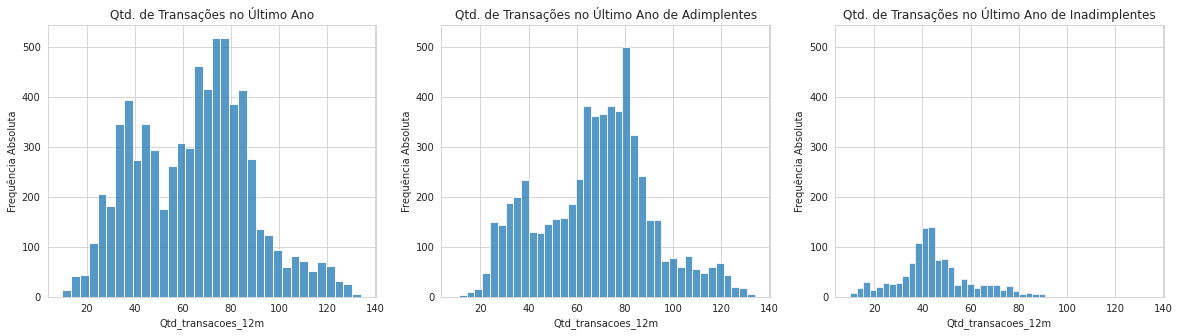

In [ ]:
coluna = "qtd_transacoes_12m"
titulos = ["Qtd. de Transações no Último Ano", "Qtd. de Transações no Último Ano de Adimplentes", "Qtd. de Transações no Último Ano de Inadimplentes"]

graficos_numericos(coluna, titulos)

Analisando esses gráficos percebo o pico que o gráfico de clientes inadimplentes tem, e lendo isso fica evidente que clientes que tem um número de transações entre 30 a 50 tendem a se tornar inadimplente e precisam de mais atenção para evitar que se isso aconteça.



*  Valor das Transações nos Últimos 12 Meses




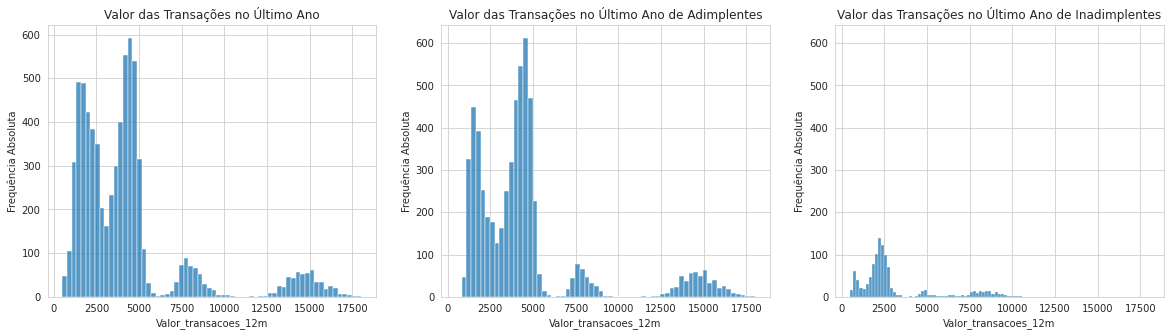

In [ ]:
coluna = "valor_transacoes_12m"
titulos = ["Valor das Transações no Último Ano", "Valor das Transações no Último Ano de Adimplentes", "Valor das Transações no Último Ano de Inadimplentes"]

graficos_numericos(coluna, titulos)

Analisando os gráficos notasse que existe um pico sugestivo no gráfico de clientes inadimplentes, e dando uma olhada mais a fundo percebe-se que clientes inadimplentes tendem a ter o valor das transações próximos a 2.500, com isso em mente, sei que clientes com transações próximas a esse valor precisam de uma atenção maior para evitar que se tornem inadimplentes.



*  Valor das Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses



Agora sei que essas duas colunas separadas conseguem me ajudar a explicar o "default", ou seja me ajudam a explicar o porquê do cliente se tornar inadimplente, eu vou junta-las para ter uma visualização melhor e talvez obter mais algum insight.


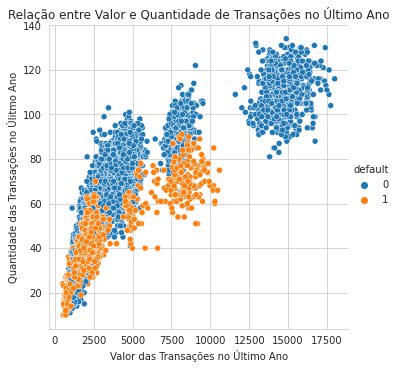

In [ ]:
f = sns.relplot(x="valor_transacoes_12m", y="qtd_transacoes_12m", data=df, hue="default")
_ = f.set(
    title="Relação entre Valor e Quantidade de Transações no Último Ano",
    xlabel="Valor das Transações no Último Ano",
    ylabel="Quantidade das Transações no Úlitmo Ano"
)

Juntando os gráficos em um só, a visualização fica mais clara e consigo ver claramente o comportamento do cliente inadimplente. Veja bem que clientes inadimplentes se agruparam em dois certos pontos do gráfico, o maior agrupado de clientes inadimplentes tem a quantidade de transações menores e a transacionar valores menores, porém existe mais um agrupado de clientes inadimplentes e esses transacionam um pouco mais de vezes e com um valor maior, mas ainda sim ficam longe da quantidade de transações e valores de transações dos clientes adimplentes. A conclusão que tenho fazendo a analise desses gráficos, falando numericamente, é a de que clientes que transacionam entre 10 a 60 vezes por ano com o valor entre 1000 e 3700 estão mais sujeitos a se tornarem inadimplentes porem não é só isso, clientes que transacionam entre 40 a 90 vezes por ano com valores entre 5000 a 10000 também tendem a se tornarem inadimplentes, e esses clientes precisam de uma atenção maior para evitar que isso aconteça, ja os clientes que tem uma alta quantidade de transações e transacionam valores alto são bem mais prováveis de não se tornarem inadimplentes, então com esse grupo de clientes eu não preciso me preocupar tanto.


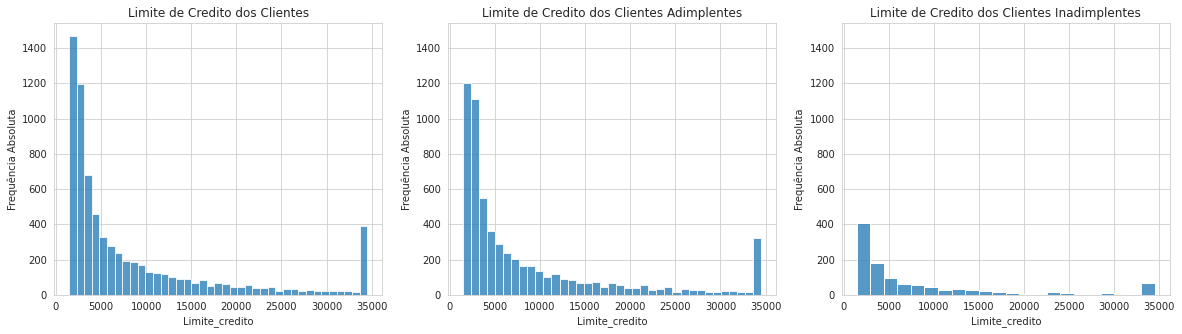

In [ ]:
coluna = "limite_credito"
titulos = ["Limite de Credito dos Clientes", "Limite de Credito dos Clientes Adimplentes", "Limite de Credito dos Clientes Inadimplentes"]

graficos_numericos(coluna, titulos)

Os gráficos do limite de crédito dos clientes não me ajudam a entender o do porquê o cliente se torna inadimplente, pois os gráficos são parecidos e quase iguais, sendo assim a coluna de limite de crédito não aponta nenhuma inconsistência que possa me ajudar a entender o default.


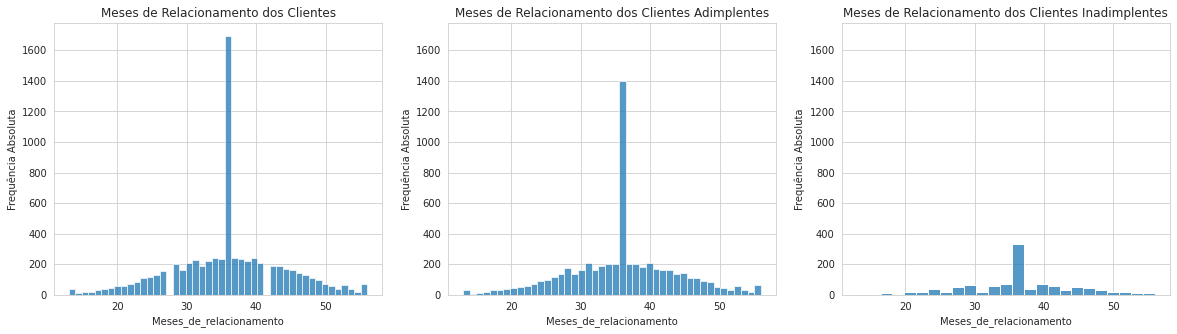

In [ ]:
coluna = "meses_de_relacionamento"
titulos = ["Meses de Relacionamento dos Clientes", "Meses de Relacionamento dos Clientes Adimplentes", "Meses de Relacionamento dos Clientes Inadimplentes"]

graficos_numericos(coluna, titulos)

Os gráficos de meses de relacionamento dos clientes também não me ajudam a entender o do porquê o cliente se torna inadimplente, consigo extrair do gráfico de inadimplentes que varia bastante os meses de relacionamento de um cliente que se torna inadimplente, porem isso não me ajuda a explicar o do porquê o cliente se torna inadimplente.


#6 Conclusão

Comecei importando os pacotes que iria usar para essas análises, após isso iniciei a etapa de exploração dos dados, comecei colocando o meu banco de dados em um *dataframe* no pandas e entendi um pouco melhor da estrutura do meu conjunto de dados. O schema foi extremamente essencial para analise pois foi nele que percebi erros e dados faltantes no meu banco de dados, descobri que no meu *dataframe* existiam colunas com o tipo de dado errado e que eu tinha dados faltantes no meu banco de dados, então fui para correção, corrigi o tipo de dado de duas colunas no meu *dataframe* e removi as linhas com dados faltantes. Após a correção fui para a etapa final, a visualização de dados, essa é a etapa aonde eu vou tentar entender a correlação das minhas variáveis explicativas com minha variável resposta "default" e buscar qual motivo leva alguém a inadimplencia, com as análises nas variáveis categóricas entendi que elas não conseguiam explicar o do porquê acontece a inadimplencia, partir para as variáveis numéricas, e foi ai aonde eu consegui extrair mais insights, percebi que clientes inadimplentes apresentam específicas quantidades e valores de transações, e isso será de grande ajuda pois eu posso voltar a minha atenção nesses clientes que apresentam essas características.
